In [132]:
import pandas as pd
import numpy as np

#DRAVIN - L

In [133]:
data=pd.read_csv("bank_data.csv")

In [134]:
data.isnull().sum()  

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [135]:
print(data['id'].unique().shape)
print(data.shape)

(1882,)
(1882, 6)


In [136]:
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [137]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [138]:
level_zero=data.loc[(data.expected_recovery_amount >=0)&(data.expected_recovery_amount <=1000)]
level_zero

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
242,618,993,790.480,Level 0 Recovery,22,Male
243,1779,993,518.300,Level 0 Recovery,36,Female
244,1963,996,1225.660,Level 0 Recovery,29,Female
245,391,998,763.270,Level 0 Recovery,26,Female


In [139]:
level_one=data.loc[(data.expected_recovery_amount >1000)&(data.expected_recovery_amount <=2000)]
level_one

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
247,1629,1001,1723.549220,Level 1 Recovery,35,Male
248,2021,1001,612.777647,Level 1 Recovery,25,Female
249,1478,1002,1659.941630,Level 1 Recovery,31,Male
250,153,1005,735.264893,Level 1 Recovery,33,Male
251,1359,1007,775.670190,Level 1 Recovery,26,Female
...,...,...,...,...,...,...
912,1282,1988,1475.957452,Level 1 Recovery,28,Female
913,1879,1988,2508.799693,Level 1 Recovery,34,Female
914,922,1990,2072.971170,Level 1 Recovery,40,Male
915,1025,1992,1364.515730,Level 1 Recovery,23,Male


In [140]:
level_one.shape

(670, 6)

<Axes: xlabel='sex', ylabel='expected_recovery_amount'>

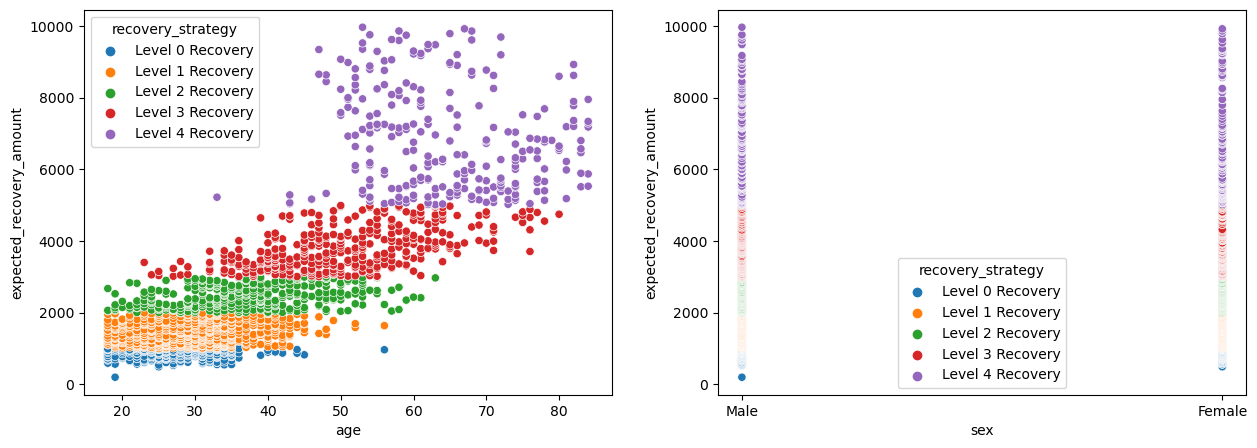

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(ax=axes[0],data=data,y='expected_recovery_amount',x='age',hue='recovery_strategy')
sns.scatterplot(ax=axes[1],data=data,y='expected_recovery_amount',x='sex',hue='recovery_strategy')


<Axes: xlabel='sex', ylabel='expected_recovery_amount'>

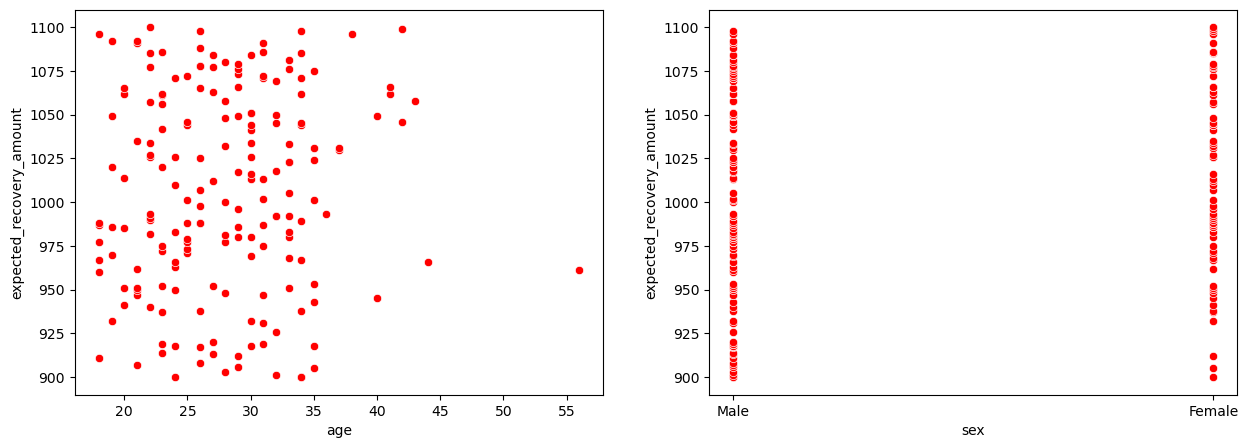

In [142]:
level_just_above_below=data.loc[(data.expected_recovery_amount >=900)&(data.expected_recovery_amount <=1100)]
level_just_above_below_compare=data.loc[(data.expected_recovery_amount >=950)&(data.expected_recovery_amount <=1050)]

fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(ax=axes[0],data=level_just_above_below,x='age',y='expected_recovery_amount',color='red')
sns.scatterplot(ax=axes[1],data=level_just_above_below,x='sex',y='expected_recovery_amount',color='red')

<Axes: xlabel='actual_recovery_amount', ylabel='expected_recovery_amount'>

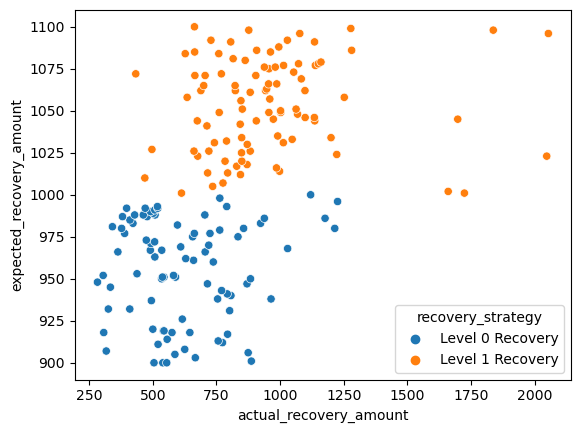

In [143]:
sns.scatterplot(data=level_just_above_below,x='actual_recovery_amount',y='expected_recovery_amount',hue='recovery_strategy')

<Axes: xlabel='actual_recovery_amount', ylabel='expected_recovery_amount'>

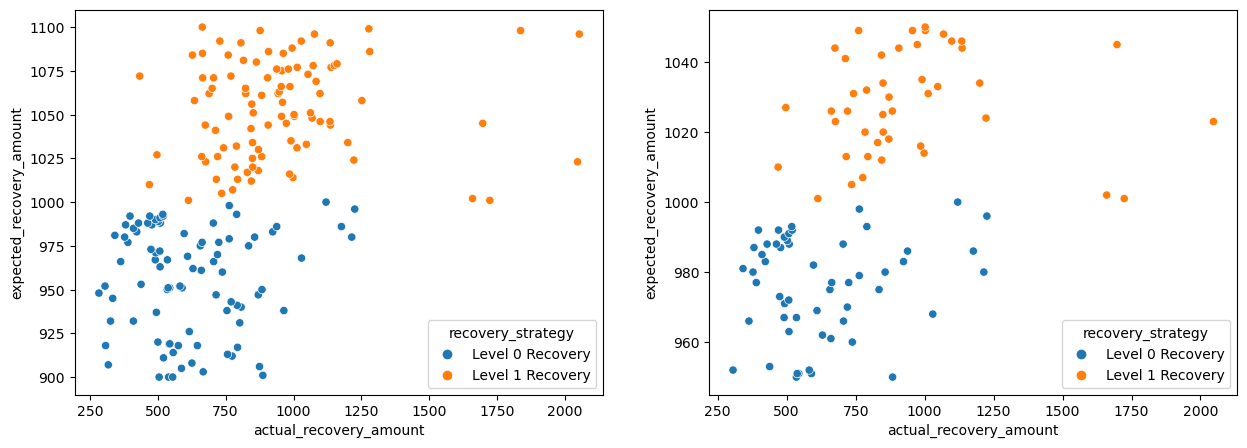

In [144]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(ax=axes[0],data=level_just_above_below,x='actual_recovery_amount',y='expected_recovery_amount',hue='recovery_strategy')
sns.scatterplot(ax=axes[1],data=level_just_above_below_compare,x='actual_recovery_amount',y='expected_recovery_amount',hue='recovery_strategy')

In [217]:
from scipy.stats import kruskal

# Filter the data between 
1100
data_filtered = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Group the data by any categorical variable, if applicable
groups = data_filtered.groupby('actual_recovery_amount')['expected_recovery_amount'].apply(list)

# Perform the Kruskal-Wallis test
statistic, pvalue = kruskal(*groups)

# Print the results
print("Kruskal-Wallis test statistic(900-1100):", statistic)
print("p-value:", pvalue)
     




data_filtered = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]

# Group the data by any categorical variable, if applicable
groups = data_filtered.groupby('actual_recovery_amount')['expected_recovery_amount'].apply(list)

# Perform the Kruskal-Wallis test
statistic, pvalue = kruskal(*groups)

# Print the results
print("Kruskal-Wallis test statistic(950-1050):", statistic)
print("p-value:", pvalue)

Kruskal-Wallis test statistic: 183.0
p-value: 0.48609714517719294
Kruskal-Wallis test statistic: 99.0
p-value: 0.4810969124082639


In [160]:
#REGRESSION ON DATA BETWEEN $900 & $1100

X=level_just_above_below['expected_recovery_amount'].values.reshape(-1,1)
y=level_just_above_below['actual_recovery_amount'].values.reshape(-1,1)

# train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.2,random_state=1)

In [190]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

Text(0.5, 1.0, 'NO THRESHOLD PREDICTIONS BETWEEN $900 & $1100 DOLLARS')

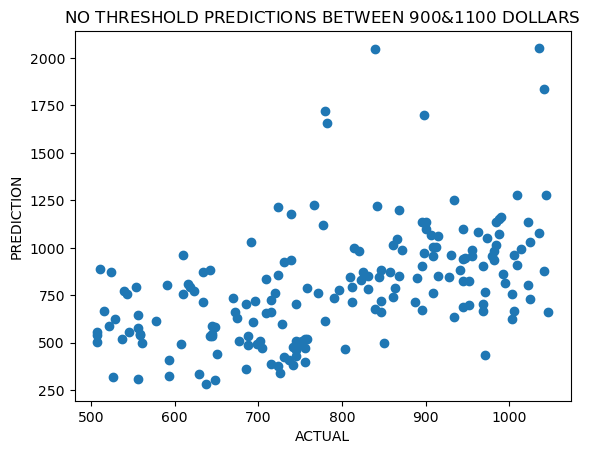

In [191]:
plt.scatter(model.predict(X),y)
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTION')
plt.title('NO THRESHOLD PREDICTIONS BETWEEN $900 & $1100 DOLLARS')

In [192]:
pred=model.predict(X)

In [193]:
from sklearn.metrics import r2_score
r2 = r2_score(y,pred)
print(" The R squared value after setting the range between 900 and 1100 dollars is ", r2)


 The R squared value after setting the range between 900 and 1100 dollars is  0.2525016112411572


/var/folders/hl/sjfclv052hg0n7c8qc5zhky00000gn/T/ipykernel_19670/945901399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_just_above_below['threshold']=(level_just_above_below['expected_recovery_amount']>=1000).astype(int)


Text(0.5, 1.0, 'THRESHOLD SET AT $1000')

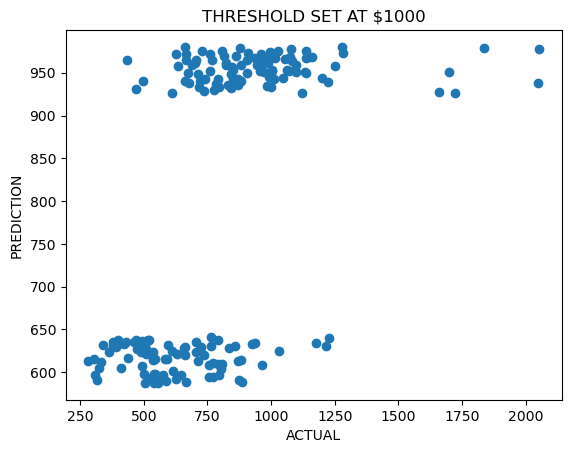

In [200]:
threshold=1000
level_just_above_below['threshold']=(level_just_above_below['expected_recovery_amount']>=1000).astype(int)

model_with_threshold=LinearRegression()

X_threshold=level_just_above_below[['expected_recovery_amount', 'threshold']].values.reshape(-1,2)
y_threshold=level_just_above_below['actual_recovery_amount'].values.reshape(-1,1)

model_with_threshold.fit(X_threshold,y_threshold)


plt.scatter(y_threshold,model_with_threshold.predict(X_threshold))
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTION')
plt.title('THRESHOLD SET AT $1000')

In [202]:
from sklearn.metrics import r2_score
r2 = r2_score(y_threshold,model_with_threshold.predict(X_threshold))
print(" The R squared value is ", r2)

 The R squared value is  0.3087807404751848


/var/folders/hl/sjfclv052hg0n7c8qc5zhky00000gn/T/ipykernel_19670/3576849953.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_just_above_below_compare['threshold']=(level_just_above_below['expected_recovery_amount']>=1000).astype(int)


Text(0.5, 1.0, 'NO THRESHOLD')

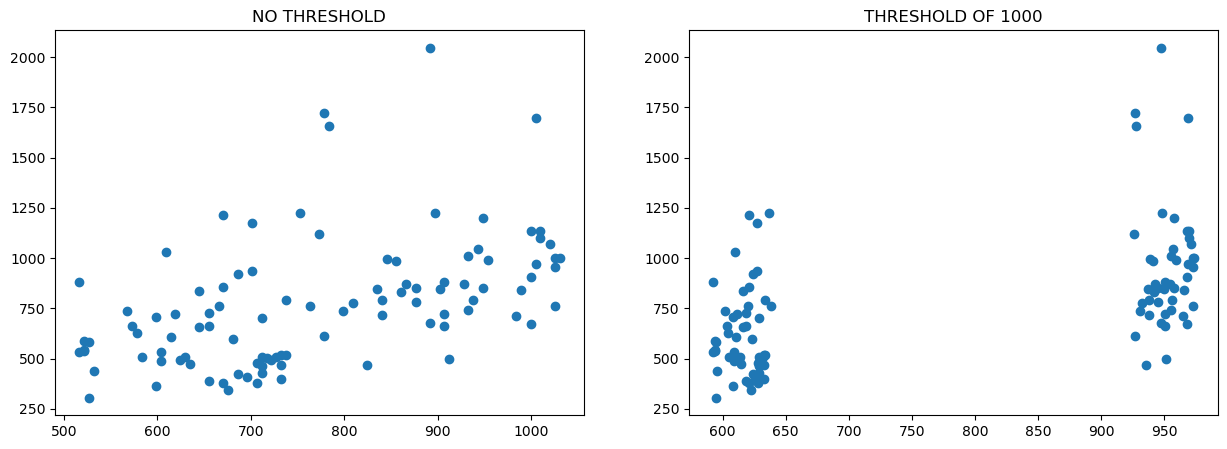

In [208]:
#REGRESSION ON DATA BETWEEN $950 & $1050

fig,axes=plt.subplots(1,2,figsize=(15,5))

X_rep=level_just_above_below_compare['expected_recovery_amount'].values.reshape(-1,1)
y_rep=level_just_above_below_compare['actual_recovery_amount'].values.reshape(-1,1)


model_repeat_on_new_range=LinearRegression()
model_repeat_on_new_range.fit(X_rep,y_rep)

pred3=model_repeat_on_new_range.predict(X_rep)

level_just_above_below_compare['threshold']=(level_just_above_below['expected_recovery_amount']>=1000).astype(int)

trainX=level_just_above_below_compare[['expected_recovery_amount', 'threshold']].values.reshape(-1,2)
trainY=level_just_above_below_compare['actual_recovery_amount'].values.reshape(-1,1)

model4=LinearRegression()
model4.fit(trainX,trainY)
pred4=model4.predict(trainX)
axes[0].scatter(model_repeat_on_new_range.predict(X_rep),y_rep)
axes[1].scatter(pred4,trainY)
axes[1].set_title('THRESHOLD OF 1000')
axes[0].set_title('NO THRESHOLD')

In [209]:
from sklearn.metrics import r2_score
r2 = r2_score(trainY,pred4)
print(" The R squared value is ", r2)

 The R squared value is  0.28733143665781835
